# 추측통계의 기본

#### 질문거리
* 난수시드가 무엇인가?

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

## 4.1 모집단과 표본

모집단population:
* 추측하고 싶은 관측대상 전체

표본sample:
* 추측에 사용하는 관측 대상의 일부분

표본통계랑:
* 표본을 바탕으로 계산한 평균, 분산, 상관계수

### 4.1.1 표본추출방법 

무작위추출random sampling: 
* 임의로 표본을 추출
* 임의로 추출했다고 편향이 없진 않다

복원추출sampling with replacement:
* 여러차례 동일한 표본을 선택

비복원추출sampling without replacement:
* 동일한 표본은 한 번만 선택

In [3]:
np.random.choice([1,2,3], 5)

array([2, 1, 3, 3, 1])

In [5]:
np.random.choice(['마고', '타이', '루씨', '수리', '키이라'], 3)

array(['키이라', '타이', '타이'], dtype='<U3')

In [6]:
np.random.choice(['마고', '타이', '루씨', '수리', '키이라'], 3, replace=False )

array(['키이라', '타이', '마고'], dtype='<U3')

In [7]:
np.random.seed(0)

In [8]:
sample = np.random.choice(scores, 20)`

In [9]:
sample.mean()

70.4

In [10]:
scores.mean()

69.53

표본과 모집단 사이에 평균값에 차이가 있다

In [11]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15


## 4.2 확률모형

* 확률모형probability model:
    * 모형이란 현상을 모형처럼 취급하여 특징을 잘 파악하도록 단순화한 것. 복잡한 현상을 분석하는데 도움 줌


* 확률변수random variable:
    * 취하는 값과 그 값이 나올 확률이 결정되어 있는 것


* 시행trial:
    * 확률변수의 결과를 관측한 값


* 실현값realization:
    * 시행에 의해 관측되는 값


* 사건event:
    * 시행결과로 나타날 수 있는 일
    * 주사위 눈이 1, 주사위 눈이 홀수와 같은 결과가 예시


* 근원사건elementary event:
    * 더 이상 분해할 수 없는 사건
    * 주사위 눈이 1이 예시


* '주사위 눈이 1'이 되는 사건의 확률이 1/6이다  
= P(X=1) = 1/6


* '주사위 눈이 홀수'인 사건의 확률  
= P((X=1)∪(X=3)∪(X=5))  
= P(X=1) + P(X=3) + P(X=5)  
= 3/6 = 1/2


* 상호배반mutually exclusive
    * 각 사건이 동시에 발생할 수 없다.
    * 독립사건과는 다르다

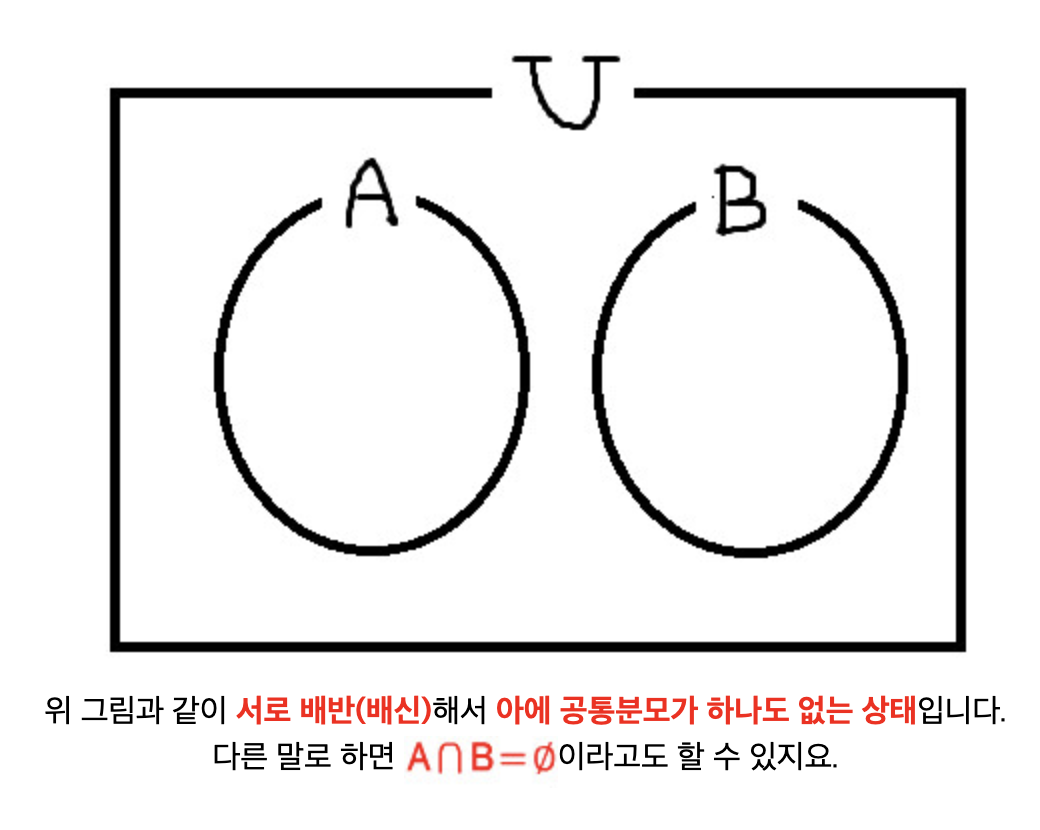

In [15]:
# 상호배반
# 출처: https://m.blog.naver.com/PostView.nhn?blogId=parkhc1992&logNo=220587985603&proxyReferer=https:%2F%2Fwww.google.com%2F
Image('./source/Mutual exclusive.png')

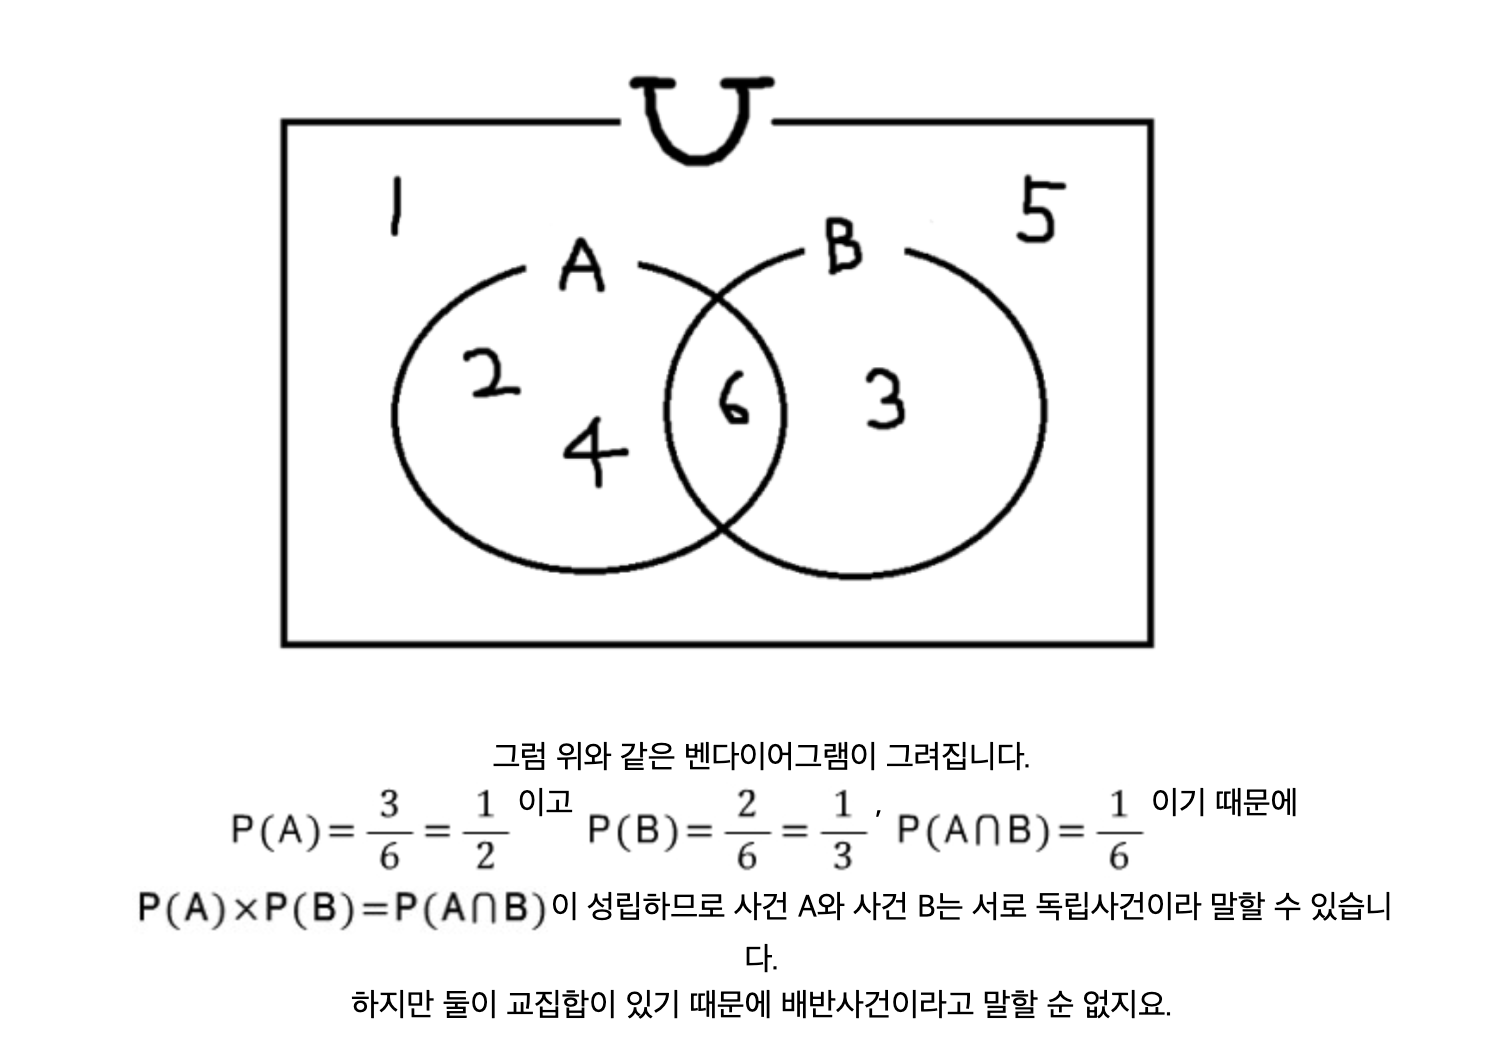

In [16]:
# 독립사건
# 출처: https://m.blog.naver.com/PostView.nhn?blogId=parkhc1992&logNo=220587985603&proxyReferer=https:%2F%2Fwww.google.com%2F
Image('./source/Independence case.png')


### 4.2.2 확률분포

* 확률분포probability distribution:
    * 전체확률이 1인 확률변수가 취할 수 있는 값이 어떻게 분포하고 있는지 표현
| 눈 | 1 | 2 | 3 | 4 | 5 | 6 |
|-|-|-|-|-|-|-|
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

In [20]:
# 불공정한 주사위
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]
np.random.choice(dice, p=prob)

1

In [30]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([1, 4, 3, 5, 6, 5, 2, 5, 6, 3, 6, 2, 2, 5, 6, 6, 4, 6, 6, 4, 2, 4,
       4, 5, 6, 5, 5, 5, 2, 2, 2, 2, 3, 6, 5, 5, 5, 5, 1, 5, 6, 4, 5, 6,
       3, 4, 1, 4, 6, 6, 5, 4, 4, 6, 2, 5, 4, 5, 6, 6, 5, 4, 6, 6, 4, 6,
       4, 4, 6, 4, 6, 3, 4, 5, 6, 2, 3, 3, 5, 6, 4, 4, 6, 2, 5, 2, 4, 4,
       5, 6, 5, 4, 6, 4, 6, 5, 3, 5, 5, 4])

In [31]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
              index = pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,3,0.03
2,12,0.12
3,8,0.08
4,24,0.24
5,26,0.26
6,27,0.27


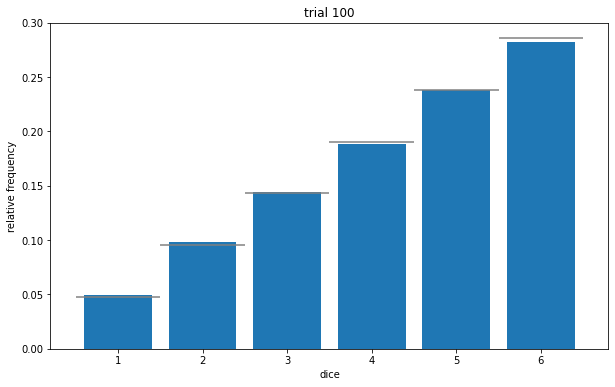

In [38]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.title('trial 100')
plt.show()

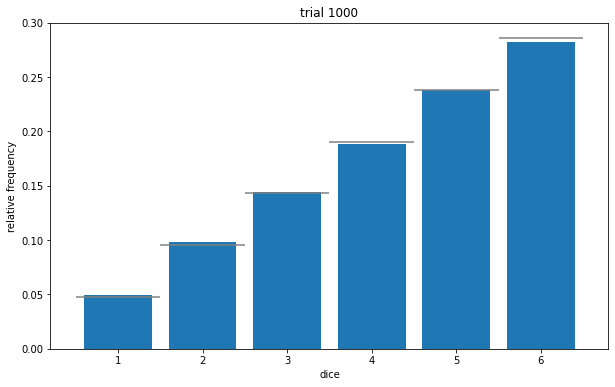

In [36]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.title('trial 1000')
plt.show()

## 4.3 추측통계의 확률

* 무작위추출을 확률모형을 기술할 수 있다
* 무작위추출로 얻은 표본은 모집단이 확률분포를 따르는 확률변수로 간주할 수 있다
* 따라서 추측통계에서 다루는 데이터는 그와 같은 확률변수의 실현값이라고 할 수 있다

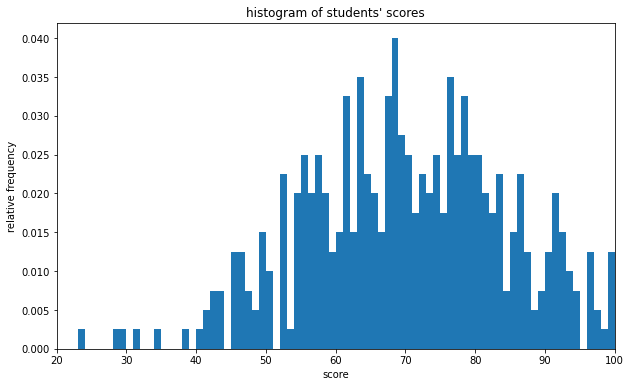

In [41]:
# 계급폭 1점 히스토그램
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.title('histogram of students\' scores')
plt.show()

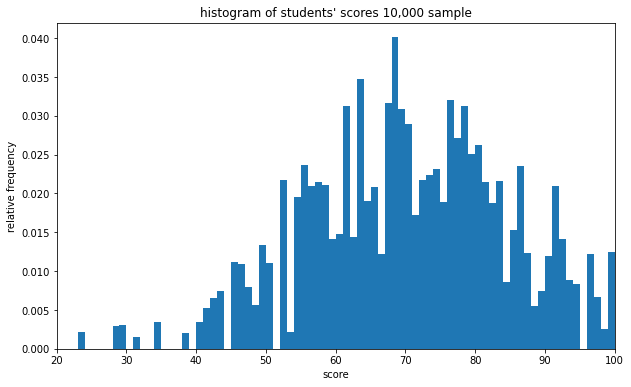

In [43]:
# 10000회 시행으로 샘플
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.title('histogram of students\' scores 10,000 sample')
plt.show()

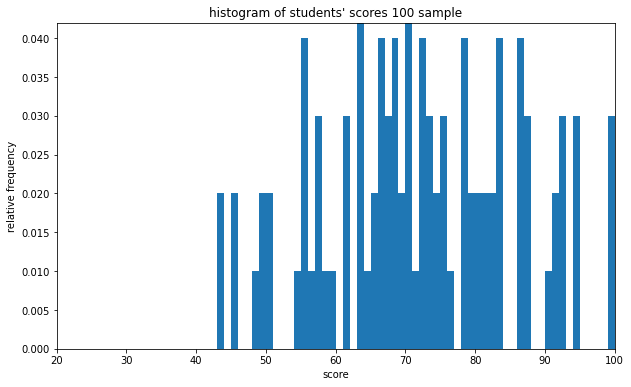

In [44]:
# 100회 시행으로 샘플
sample = np.random.choice(scores, 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.title('histogram of students\' scores 100 sample')
plt.show()

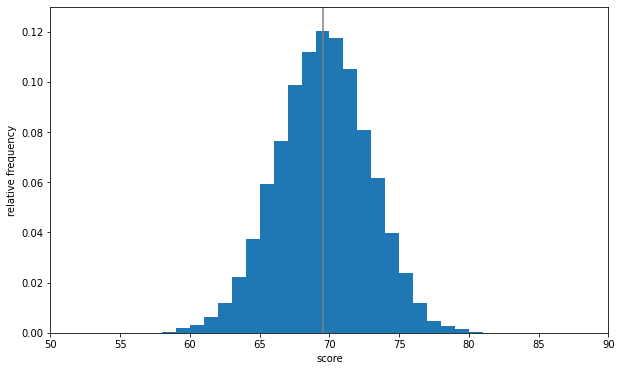

In [46]:
# 표본 하나하나 확률변수이므로 표본들의 평균으로 계산되는 표본평군도 역시 확률변수이다
# 세로선이 모평균
# 표본평균은 산포도이므로 모평균을 중심으로 분포한다

sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()


## 4.4 이제부터 배울 내용

* 모수에서 표본을 추출해서 모수와 표본의 값을 비교하였다
* 우리는 보통 모수를 얻지 못하기에 표본을 통해서 모수를 알아보려한다


* 추정estimatetion
    * 표본으로 모수를 추측한다
    * 점추정: 하나의 값으로 추정하는 것
    * 구간추정: 구간으로 추정하는 것


* 검정test
    * 모집단의 통계적 성질에 대해 가설을 세우고 그 가설이 옳은지 판단하는 기법